# Air Pollution Comparison

We complete an air pollution comparison study between numerous geographic areas to understand what areas maintain air quality the best, and how we can replicate the healthy practices that lead to a stronger air quality index (AQI). 

### Notebooks
* [Overview Notebook](airpollution.ipynb)
* [Processing Notebook](dataprocessing.ipynb)
* [Analysis Notebook](data-analysis.ipynb)

### Running Data Processing Notebook

We are now going to run the data processing notebook to import a lot of the processing functions we will be using.

In [1]:
%run dataprocessing.ipynb

### Testing Raw Plots

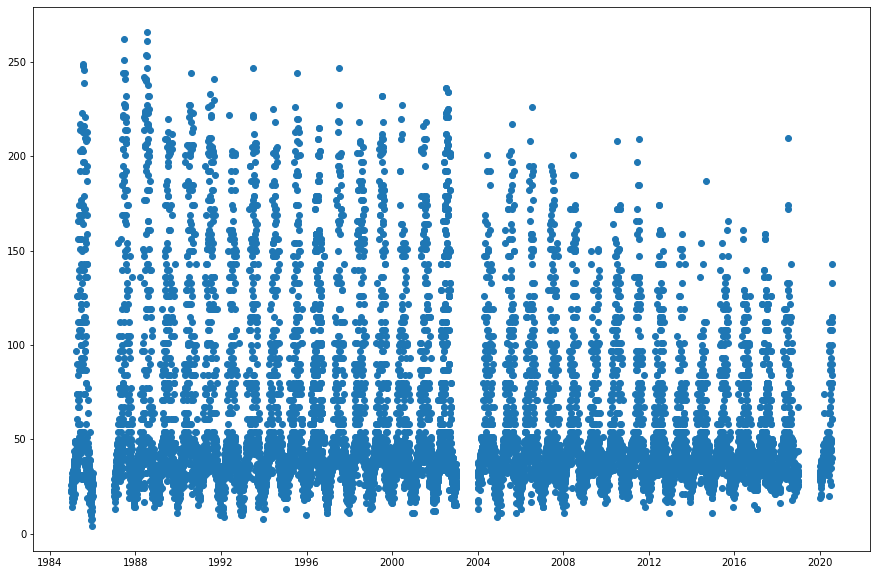

In [2]:
plt.figure(figsize = (15,10))
plt.scatter(ny_nj_pa_files['date'], ny_nj_pa_files['ozone_aqi'])

### Specific Comparisons

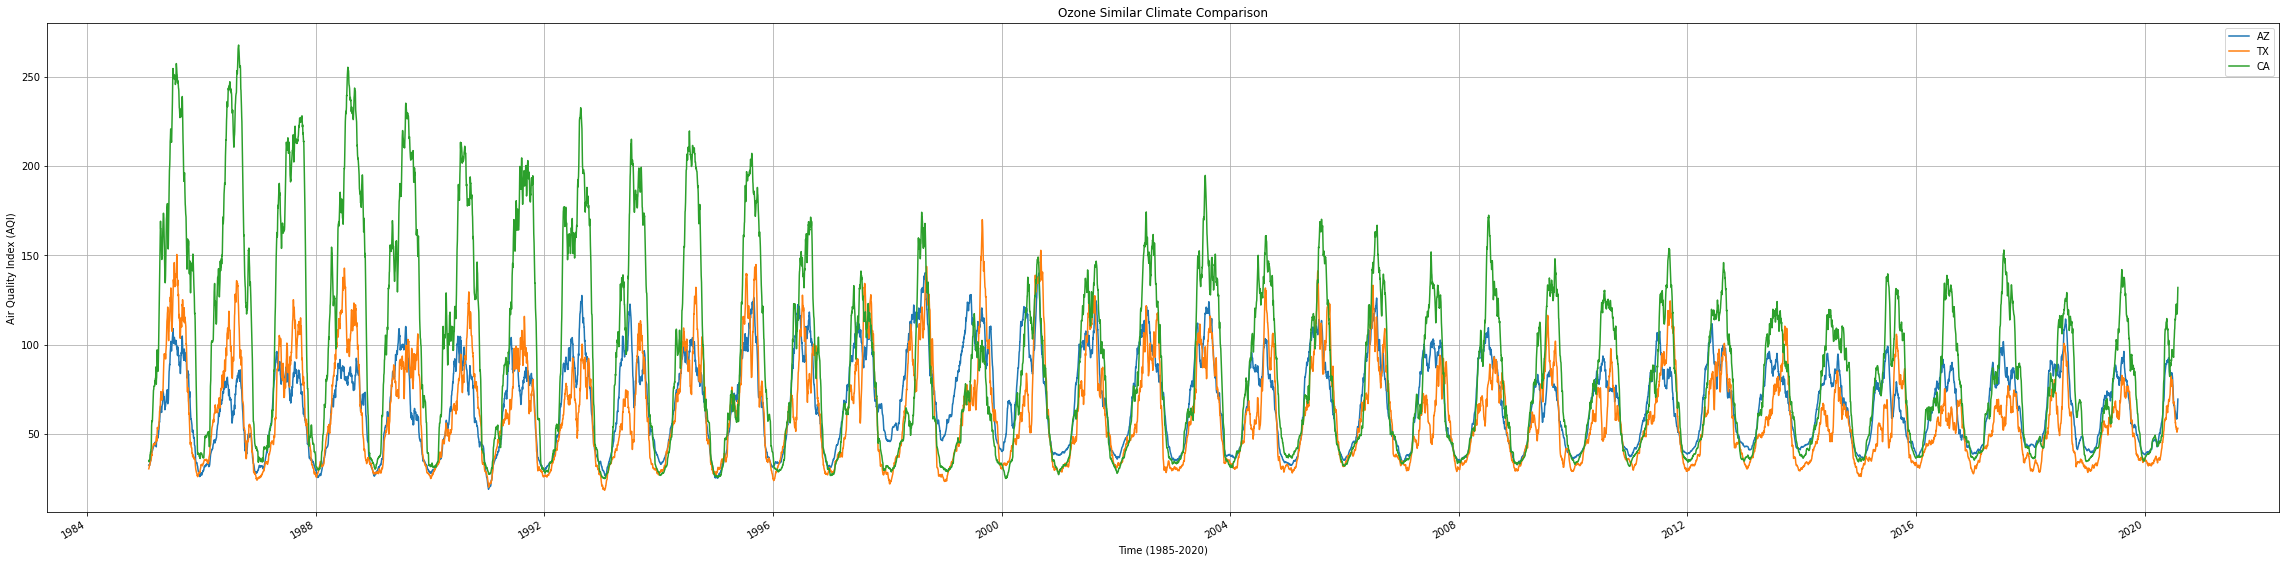

In [3]:
az_tx_ca = [az, tx, ca]
data = az_tx_ca[0]
for f in range (1, len(az_tx_ca)):
        data = pd.merge(data, az_tx_ca[f], how = 'inner', on = 'date')
ax = data.plot.line('date', ['ozone_aqi_smoothed_x', 'ozone_aqi_smoothed_y', 'ozone_aqi_smoothed'], figsize = (40,10), title = 'Ozone Similar Climate Comparison')
ax.legend(['AZ', 'TX', 'CA'])
ax.set_xlabel('Time (1985-2020)')
ax.set_ylabel('Air Quality Index (AQI)')
ax.grid(True)